In [1]:
import sys
import os
from pathlib import Path
import numpy as np       
import matplotlib.pyplot as plt

In [2]:
# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)

os.chdir(project_path)
sys.path.append(project_path)

In [ ]:
input_dir = f"{project_path}/exp/signal-to-signal-correlation&coherence/data"

files = os.listdir(input_dir)
for file in files:
    if file.endswith('.npy'):
        if file == 'ecog.npy':
            ecog_data = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'probe1.npy':
            probe1_data = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'probe2.npy':
            probe2_data = np.load(input_dir + '/' + file, allow_pickle=True)
        if file == 'times_ecog.npy':
            times = np.load(input_dir + '/' + file, allow_pickle=True)
            times = times[0]

In [4]:
# read event times
upstates = np.load(f"{input_dir}/event_times.npy", allow_pickle=True)
# Get downstates as intervals between upstates
downstates = []
for i in range(len(upstates) - 1):
    downstates.append([upstates[i][1], upstates[i + 1][0]])

(10.0, 15.0)

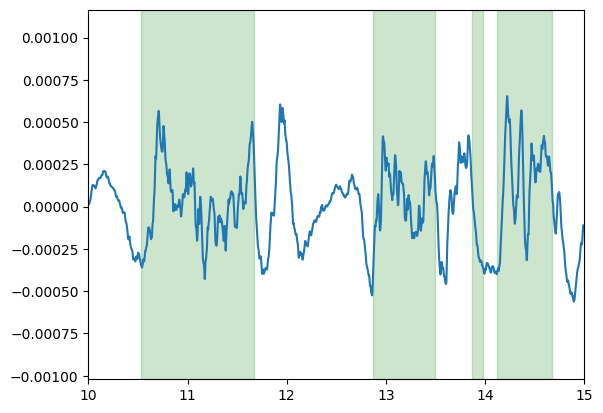

In [5]:
plt.plot(times, ecog_data[0])
for upstate in upstates:
    plt.axvspan(upstate[0], upstate[1], color='green', alpha=0.2)
plt.xlim(10, 15)

In [9]:
from src.utils import split_intervals

ecog_data_upstates, ecog_data_downstates = split_intervals(ecog_data, times, upstates, downstates)

100%|██████████| 2129/2129 [00:00<00:00, 56026.51it/s]


In [10]:
ecog_data_upstates_ch1 = ecog_data_upstates[0]
ecog_data_upstate = ecog_data_upstates_ch1[16]
ecog_data_upstate.shape

(550,)

In [11]:
times_interval = times[np.logical_and(times >= upstates[17][0], times < upstates[17][1])]
times_interval.shape

(550,)

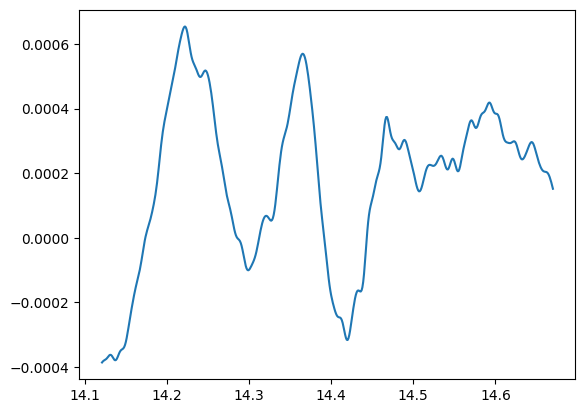

In [12]:
import matplotlib.pyplot as plt
plt.plot(times_interval, ecog_data_upstate)

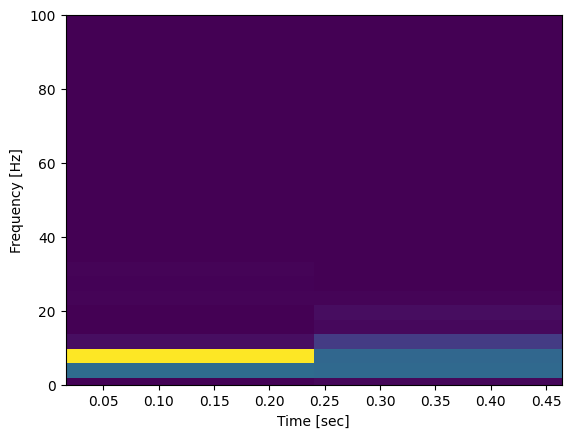

In [13]:
# plot spectrogram
from scipy import signal
f, t, Sxx = signal.spectrogram(ecog_data_upstate, fs=1000)
plt.pcolormesh(t, f, Sxx)
plt.ylim(0, 100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [1]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv(f"/Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/upstates-intervals/data/spectral_properties.csv")
upstate_data = data[data['State'] == 'upstate']
downstate_data = data[data['State'] == 'downstate']
# Remove rows with NaN with 0
data = data.fillna(0)

In [15]:
downstate_data

,Interval id,State,Channel,Central frequencies,Peak powers,Bandwidths,Power spectrum (freqs),Power spectrum (powers)
50368,6,downstate,0,38.957,1.264,0.949,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[7.07540002e-10 1.00481810e-08 2.08231257e-08 ...
50369,9,downstate,0,50.204,1.587,3.825,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[2.04371300e-09 1.68624508e-08 8.23181814e-09 ...
50370,10,downstate,0,11.442,1.496,3.456,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[1.44005713e-10 3.38010035e-10 3.65830166e-11 ...
50371,11,downstate,0,53.341,1.269,3.406,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[3.85457192e-10 6.27895369e-09 1.23072197e-09 ...
50372,12,downstate,0,88.729,0.997,9.658,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[3.68844441e-09 1.86893166e-08 1.10322777e-08 ...
...,...,...,...,...,...,...,...,...
88699,1772,downstate,63,59.428,1.404,3.235,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[5.50445644e-12 6.91486530e-09 2.41182135e-09 ...
88700,1777,downstate,63,37.130,1.276,1.132,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[5.20451803e-10 9.03127997e-10 2.99623674e-10 ...
88701,1781,downstate,63,80.901,1.261,3.949,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[5.12406463e-10 1.06136563e-08 2.98838494e-08 ...
88702,1782,downstate,63,59.992,1.255,12.000,[ 0. 2. 4. 6. 8. 10. 12. 14. 16. ...,[3.61614968e-11 2.65917068e-09 1.29786151e-09 ...


In [16]:
# Import custom modules
from src.utils import get_values_inside_brackets, parse_spectrum

ModuleNotFoundError: No module named 'src'

In [20]:
upstate_cf_channels, upstate_bw_channels, upstate_pow_channels = [], [], []
downstate_cf_channels, downstate_bw_channels, downstate_pow_channels = [], [], []

for channel in upstate_data['Channel'].unique():
    upstate_data_ch = upstate_data[upstate_data['Channel'] == channel]
    downstate_data_ch = downstate_data[downstate_data['Channel'] == channel]

    # Get all center frequencies, bandwidths, and powers
    upstate_cf = upstate_data_ch['Central frequencies'].values
    upstate_bw = upstate_data_ch['Bandwidths'].values
    upstate_pow = upstate_data_ch['Peak powers'].values

    downstate_cf = downstate_data_ch['Central frequencies'].values
    downstate_bw = downstate_data_ch['Bandwidths'].values
    downstate_pow = downstate_data_ch['Peak powers'].values

    # Get all center frequencies, bandwidths, and powers
    upstate_cf = upstate_data_ch['Central frequencies'].values
    upstate_bw = upstate_data_ch['Bandwidths'].values
    upstate_pow = upstate_data_ch['Peak powers'].values

    downstate_cf = downstate_data_ch['Central frequencies'].values
    downstate_bw = downstate_data_ch['Bandwidths'].values
    downstate_pow = downstate_data_ch['Peak powers'].values

    # Append to list
    upstate_cf_channels.extend(upstate_cf)
    upstate_bw_channels.extend(upstate_bw)
    upstate_pow_channels.extend(upstate_pow)

    downstate_cf_channels.extend(downstate_cf)
    downstate_bw_channels.extend(downstate_bw)
    downstate_pow_channels.extend(downstate_pow)

(38336, 101)
(101,)
(101,)
(50368, 101)


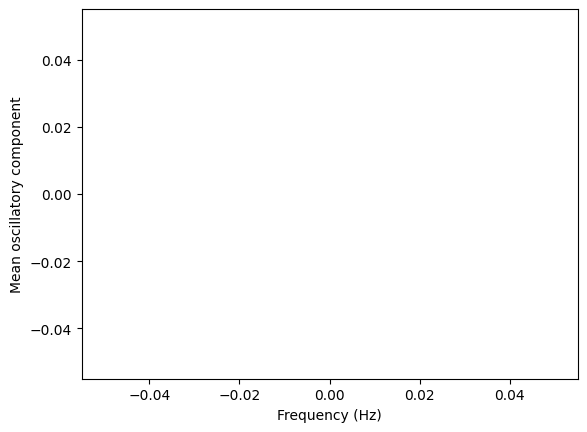

In [31]:
from fooof.sim import gen_freqs
from scipy import signal
import matplotlib.pyplot as plt

def gauss(mu,sigma,x):
    # lower normal part of gaussian
    normal = 1/(2.0 * np.pi * sigma**2)
    # calculating Gaussian filter
    gauss = np.exp(-((x-mu)**2 / (2.0 * sigma**2))) * normal
    return gauss

freqs = gen_freqs(freq_range=[0,100], freq_res=1)
downstate_peak_vals = []
for cf, bw, pw in zip(downstate_cf_channels, downstate_bw_channels, downstate_pow_channels):
    peak_vals = gauss(cf,bw,freqs)
    downstate_peak_vals.append(peak_vals)
    
downstate_peak_vals = np.array(downstate_peak_vals)
print(downstate_peak_vals.shape)
downstate_peak_vals_mean = np.mean(downstate_peak_vals, axis=0)
print(downstate_peak_vals_mean.shape)
print(freqs.shape)
upstate_peak_vals = []
for cf, bw, pw in zip(upstate_cf_channels, upstate_bw_channels, upstate_pow_channels):
    peak_vals = gauss(cf,bw,freqs)
    upstate_peak_vals.append(peak_vals)
    
upstate_peak_vals = np.array(upstate_peak_vals)
print(upstate_peak_vals.shape)
upstate_peak_vals_mean = np.mean(upstate_peak_vals, axis=0)

plt.plot(freqs, downstate_peak_vals_mean, label = 'Downstate')
# plt.plot(freqs, upstate_peak_vals_mean, label = 'Upstate')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean oscillatory component')
plt.show()